<a href="https://colab.research.google.com/github/jhonfirefox/Laboratorios_TT/blob/main/Lab2_ADB_TT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Se importan las librerias necesarias para los codigos
import pandas as pd
import numpy as np
from cryptography.fernet import Fernet
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Definimos algunas funciones que se utilizaran con frecuencia
def validacionDatos_Numerico(datos, campo):
  datos['Validacion_'+campo] = datos[campo].apply(lambda x:'Válido' if (pd.notnull(x) and (isinstance(x, int) or isinstance(x, float))) else 'Inválido')

#Funcion para validar que los datos sean no negativos
def validacionDatos_Numerico_NN(datos, campo):
  datos['Validacion_NN_'+campo] = datos[campo].apply(lambda x:'Válido' if (pd.notnull(x) and (isinstance(x, int) or isinstance(x, float)) and x >= 0) else 'Inválido')

def valoresFaltantes(datos):
    return datos.isnull().sum()

##Corregimos la fecha de los registros que estan en formato "%Y/%m/%d"
def corregir_fecha(fecha_str, formato):
    try:
        fecha = datetime.datetime.strptime(fecha_str, formato)
        return fecha.strftime("%Y-%m-%d")
    except ValueError:
        return fecha_str

def validarFecha(fecha_str, formato):
    try:
        fecha = datetime.datetime.strptime(fecha_str, formato)
        return "Válido"
    except ValueError:
        return "Inválido"
def eliminarFechasNulas(datos, campo):
  for indice, fecha in enumerate(datos[campo]):
    if pd.isnull(fecha):
      datos = datos.drop(indice)
  return datos

#Validamos que el campo de la fecha se encuentre correcto
def validacionDatos_Fecha(datos, campo, formatoFecha):
   #datos['Validacion'+campo] = datos[campo].apply(lambda x:'Válido' if isinstance(datetime.datetime.strptime(x, "%Y/%m/%d"), datetime.datetime) else 'Inválido')
   datos['Validacion_'+campo] = datos[campo].apply(validarFecha, args=(formatoFecha,))




**Parte** 1: Introducción a Python
-
Ejercicio breve: Escribir un programa que reciba una lista de números enteros y determine la cantidad de números pares e impares.

In [10]:
listaNum = input("Ingrese una lista de numeros separados por comas: ")
print(listaNum)
listaNum = listaNum.split(",")
listaNum = [int(i) for i in listaNum]
print(listaNum)

Ingrese una lista de numeros separados por comas: 1,2,345,6,778,8
1,2,345,6,778,8
[1, 2, 345, 6, 778, 8]


In [11]:
#Determinamos cuales son pares o impares

for i in listaNum:
  if i % 2 == 0:
    print(f"El numero {i} es par")
  else:
    print(f"El numero {i} es impar")

El numero 1 es impar
El numero 2 es par
El numero 345 es impar
El numero 6 es par
El numero 778 es par
El numero 8 es par


**Parte** 2: Manipulación de datos con Pandas y NumPy

In [12]:
#Carga y exploración inicial de datos:
#Extraemos los datos del archivo CSV de GitHub
#url  = "https://raw.githubusercontent.com/jhonfirefox/Laboratorios_TT/main/Lab1_DA.csv""
url = "https://raw.githubusercontent.com/jhonfirefox/Laboratorios_TT/main/CSV_Laboratorio2_AD_B.csv"
datos1_df = pd.read_csv(url, sep=",", decimal=".", encoding='windows-1252')
datos1_df.head(10)


,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida
0,A,Enero,Norte,15.24,45
1,A,Enero,Sur,92.37,11
2,A,Enero,Este,49.81,29
3,A,Enero,Oeste,31.58,36
4,A,Febrero,Norte,18.45,25
5,A,Febrero,Sur,26.46,21
6,A,Febrero,Este,94.12,36
7,A,Febrero,Oeste,67.44,10
8,A,Marzo,Norte,56.50,37
9,A,Marzo,Sur,69.14,9


In [13]:
#Obtenemos informacion del dataset
datos1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Producto          64 non-null     object 
 1   Mes               64 non-null     object 
 2   Sucursal          64 non-null     object 
 3   Precio_unitario   64 non-null     float64
 4   Cantidad_vendida  64 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [14]:
#Obtenemos informacion del dataset
datos1_df.describe()

,Precio_unitario,Cantidad_vendida
count,64.000000,64.000000
mean,54.157813,27.781250
std,26.611892,12.794429
min,11.380000,5.000000
25%,31.012500,17.750000
50%,55.795000,25.000000
75%,72.595000,36.250000
max,98.160000,49.000000


In [15]:
#Transformación de datos:
#Crear una nueva columna llamada “Ingresos Totales”.
datos1_df['Ingresos_Totales_Mensual'] = datos1_df['Precio_unitario']*datos1_df['Cantidad_vendida']
datos1_df

,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida,Ingresos_Totales_Mensual
0,A,Enero,Norte,15.24,45,685.80
1,A,Enero,Sur,92.37,11,1016.07
2,A,Enero,Este,49.81,29,1444.49
3,A,Enero,Oeste,31.58,36,1136.88
4,A,Febrero,Norte,18.45,25,461.25
...,...,...,...,...,...,...
59,D,Marzo,Oeste,44.69,36,1608.84
60,D,Abril,Norte,71.35,23,1641.05
61,D,Abril,Sur,40.66,16,650.56
62,D,Abril,Este,33.46,39,1304.94


In [16]:
#Filtrar datos según una condición (Filtrar aquellos productos de los que se hay vendido más de 40 unidades).
datos1_df[datos1_df['Cantidad_vendida'] > 40]

,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida,Ingresos_Totales_Mensual
0,A,Enero,Norte,15.24,45,685.80
12,A,Abril,Norte,14.29,49,700.21
14,A,Abril,Este,24.28,48,1165.44
17,B,Enero,Sur,18.26,49,894.74
25,B,Marzo,Sur,41.17,49,2017.33
30,B,Abril,Este,89.80,41,3681.80
33,C,Enero,Sur,94.01,49,4606.49
35,C,Enero,Oeste,58.54,48,2809.92
40,C,Marzo,Norte,88.05,49,4314.45
43,C,Marzo,Oeste,70.95,41,2908.95


In [17]:
#Filtrar los 10 precios más altos.
datos1_df.nlargest(10, 'Precio_unitario')

,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida,Ingresos_Totales_Mensual
20,B,Febrero,Norte,98.16,24,2355.84
29,B,Abril,Sur,95.42,35,3339.70
39,C,Febrero,Oeste,94.98,19,1804.62
38,C,Febrero,Este,94.95,13,1234.35
6,A,Febrero,Este,94.12,36,3388.32
33,C,Enero,Sur,94.01,49,4606.49
1,A,Enero,Sur,92.37,11,1016.07
30,B,Abril,Este,89.80,41,3681.80
40,C,Marzo,Norte,88.05,49,4314.45
47,C,Abril,Oeste,83.86,7,587.02


In [19]:
#Realizamos una operacion de sort sobre los diez datos con el precio unitario mas alto
datos1_df.sort_values(by='Precio_unitario', ascending=False)

,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida,Ingresos_Totales_Mensual
20,B,Febrero,Norte,98.16,24,2355.84
29,B,Abril,Sur,95.42,35,3339.70
39,C,Febrero,Oeste,94.98,19,1804.62
38,C,Febrero,Este,94.95,13,1234.35
6,A,Febrero,Este,94.12,36,3388.32
...,...,...,...,...,...,...
28,B,Abril,Norte,14.33,25,358.25
12,A,Abril,Norte,14.29,49,700.21
55,D,Febrero,Oeste,13.51,35,472.85
22,B,Febrero,Este,11.54,32,369.28


<Axes: xlabel='Sucursal', ylabel='Cantidad_vendida'>

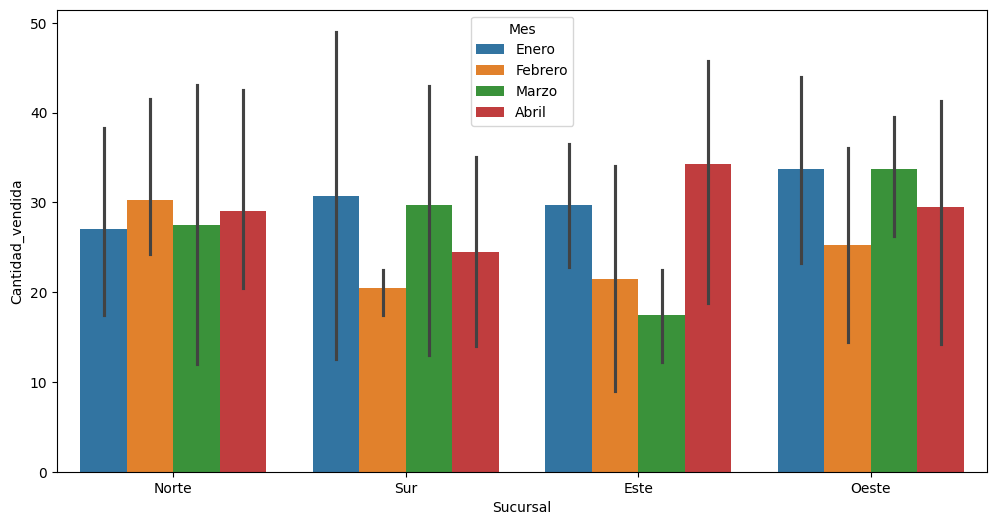

In [21]:
#Parte 3: Visualización de datos con Matplotlib y Seaborn
#Crear un gráfico de barras que agrupe las ventas por sucursal y mes, y sume las cantidades vendidas.
plt.figure(figsize=(12, 6))
sns.barplot(x='Sucursal', y='Cantidad_vendida', hue='Mes', data=datos1_df)

<Axes: xlabel='Sucursal', ylabel='Ingresos_Totales_Mensual'>

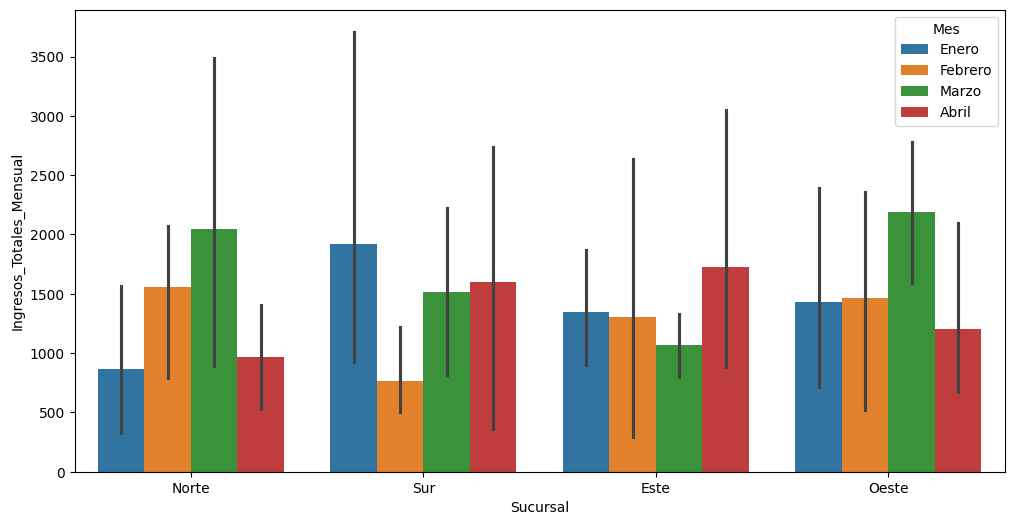

In [25]:
#Parte 3: Visualización de datos con Matplotlib y Seaborn
#Crear un gráfico de barras que agrupe las ventas por sucursal y mes, y sume las cantidades vendidas.
plt.figure(figsize=(12, 6))
sns.barplot(x='Sucursal', y='Ingresos_Totales_Mensual', hue='Mes', data=datos1_df)

In [26]:
datos1_df.describe()

,Precio_unitario,Cantidad_vendida,Ingresos_Totales_Mensual
count,64.000000,64.000000,64.000000
mean,54.157813,27.781250,1435.397031
std,26.611892,12.794429,1007.527258
min,11.380000,5.000000,193.460000
25%,31.012500,17.750000,682.950000
50%,55.795000,25.000000,1167.920000
75%,72.595000,36.250000,1897.262500
max,98.160000,49.000000,4606.490000


In [31]:
for sucursal in datos1_df['Sucursal'].unique():
  print(f"Sucursal: {sucursal}")
  print(datos1_df[datos1_df['Sucursal'] == sucursal].describe())
#datos1_df[datos1_df['Sucursal'] == 'Norte'].describe()

Sucursal: Norte
       Precio_unitario  Cantidad_vendida  Ingresos_Totales_Mensual
count        16.000000          16.00000                 16.000000
mean         50.683125          28.43750               1359.965625
std          29.434398          12.88911               1025.997941
min          11.380000          12.00000                193.460000
25%          17.647500          18.75000                696.607500
50%          59.050000          25.00000               1080.920000
75%          71.402500          39.00000               1806.060000
max          98.160000          49.00000               4314.450000
Sucursal: Sur
       Precio_unitario  Cantidad_vendida  Ingresos_Totales_Mensual
count        16.000000         16.000000                  16.00000
mean         54.495625         26.375000                1449.93750
std          27.426936         14.027948                1190.98172
min          18.260000          9.000000                 258.84000
25%          28.597500         1

In [32]:
#Valor total de ventas por sucursal
datos1_df.groupby('Sucursal')['Ingresos_Totales_Mensual'].sum()

,Ingresos_Totales_Mensual
Sucursal,
Este,21794.32
Norte,21759.45
Oeste,25112.64
Sur,23199.00


In [33]:
#Valor total de ventas por mes
datos1_df.groupby('Mes')['Ingresos_Totales_Mensual'].sum()

,Ingresos_Totales_Mensual
Mes,
Abril,21950.56
Enero,22262.73
Febrero,20367.60
Marzo,27284.52


In [35]:
#Valor total de ventas por producto
datos1_df.groupby('Producto')['Ingresos_Totales_Mensual'].sum()

,Ingresos_Totales_Mensual
Producto,
A,20653.88
B,23437.47
C,28373.01
D,19401.05


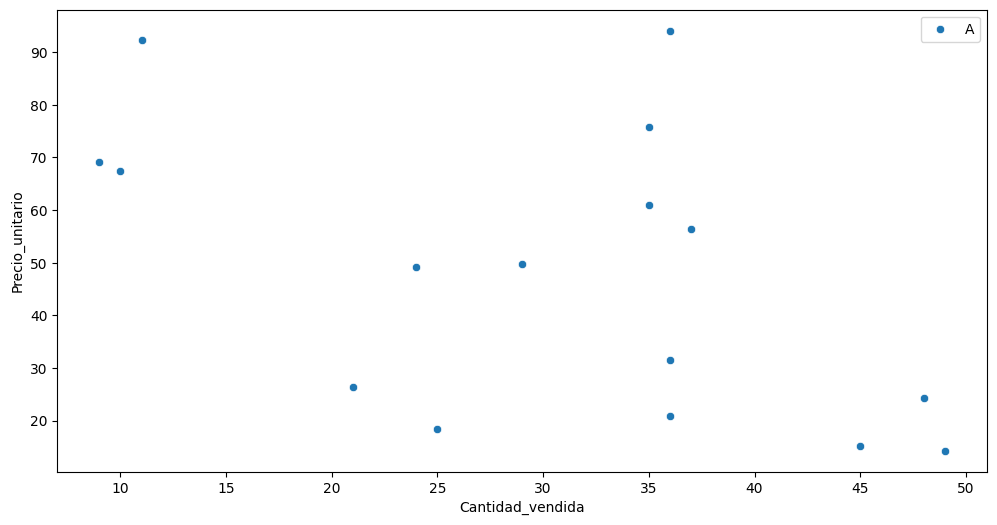

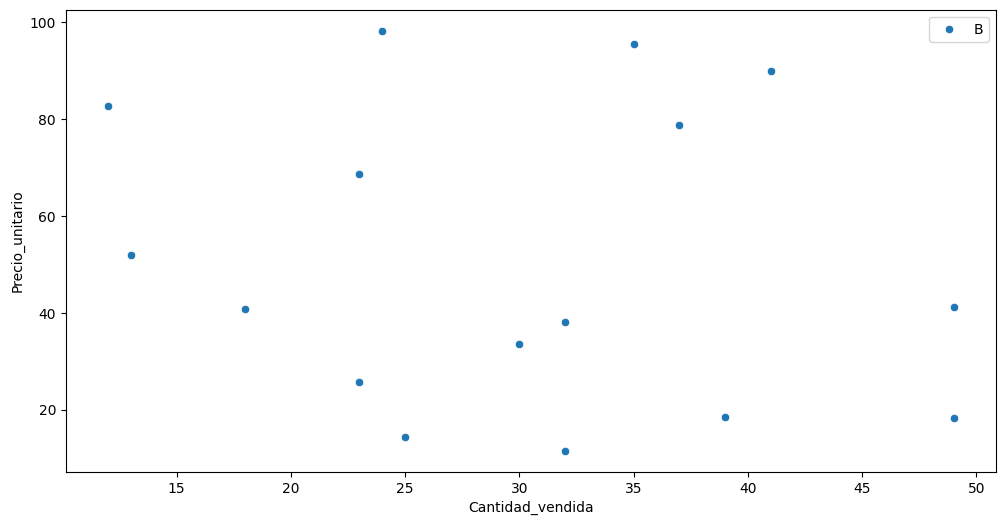

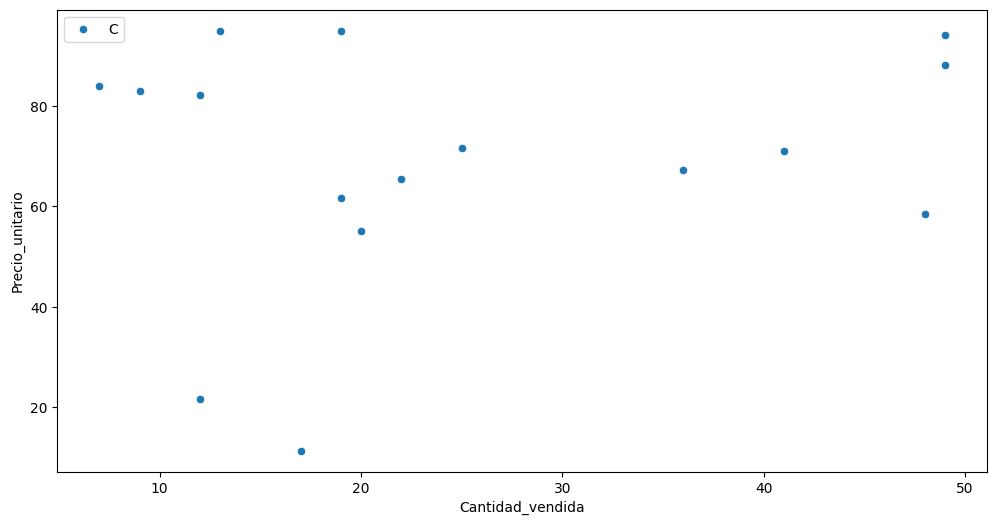

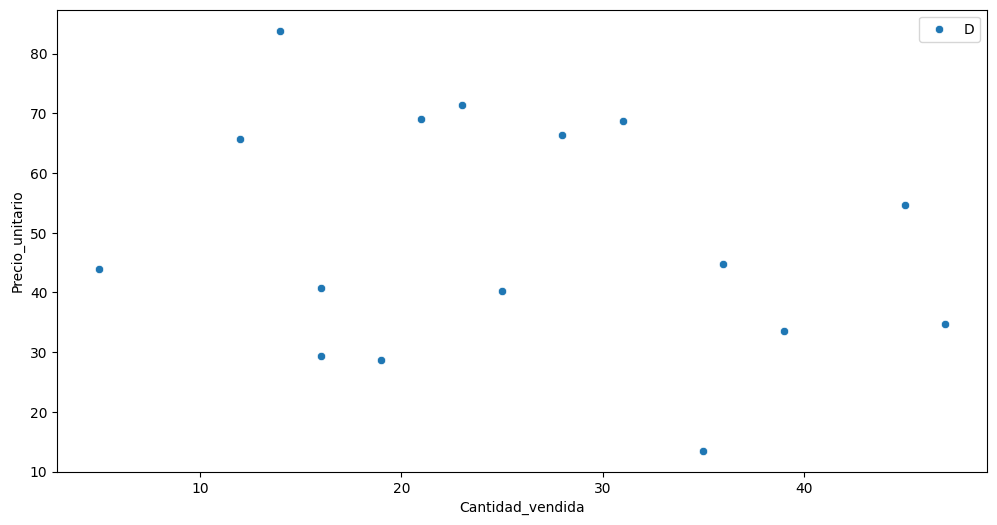

In [39]:
#Crear un gráfico de dispersión para mostrar la relación entre las columnas “Precio Unitario” y “Cantidad Vendida”
for producto in datos1_df['Producto'].unique():
  plt.figure(figsize=(12, 6))
  sns.scatterplot(x='Cantidad_vendida', y='Precio_unitario', data=datos1_df[datos1_df['Producto'] == producto], label = producto)
#sns.scatterplot(x='Cantidad_vendida', y='Precio_unitario', data=datos1_df[datos1_df['Producto'] == 'A'])

In [ ]:
#Parte 4: Integración y Conclusión
#Realizar un pequeño análisis exploratorio, Redactar una conclusión breve sobre los hallazgos.

En primer lugar apartir del tratamiento y visualizacion de los datos podemos sacar las siguientes conclusiones:



*   Los datos tratados representan el historial de ventas de una empresa en diferentes sucursales en distintos meses del anio

*    El valor promedio del precio unitario es de 54.15 por cada sucursal y el valor promedio de productos vendidos es 28 productos aproximadamente

*    El valor minimo para precio unitario y cantidad vendidad por sucursal es :(11.38000, 5.000000)
*    El valor maximo para precio unitario y cantidad vendidad por sucursal es: (98.160000, 49.000000)
* La sucursal que mas a vendido es la surcursal Oeste y Sur, seguida por la sucursal Este y Norte
*    El mes que más se ha vendido es el de marzo y el mes que menos se ha vendido es el mes de febrero
*   Los campos de Precio unitario y cantidad vendida no muestra una correlaccion aparente, una razon posible para esto se debe a la ventana de tiempo que se tiene para los datos, la cual es solamente de 4 meses

